In [40]:
import cv2
import matplotlib.pyplot as plt

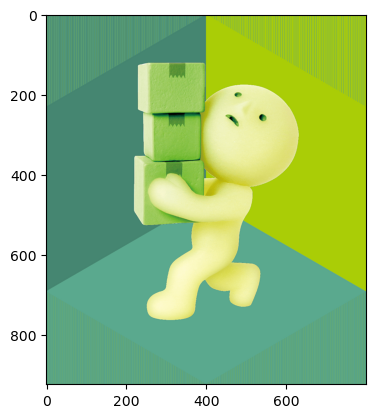

In [41]:
img = cv2.imread('smiski_images/balancing-boxes.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

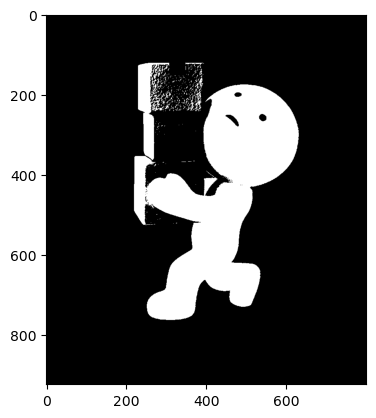

In [42]:
# code to threshold the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

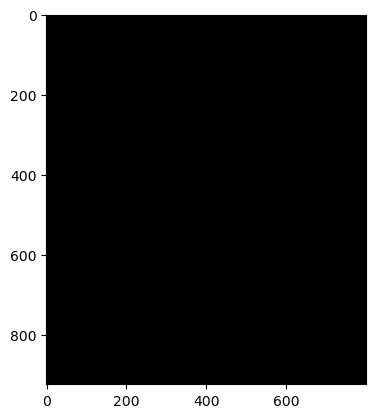

In [43]:
# find contours and combine them filled
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
filled = img.copy()
cv2.drawContours(filled, contours, -1, (0, 255, 0), cv2.FILLED)
plt.imshow(cv2.cvtColor(filled, cv2.COLOR_BGR2RGB))

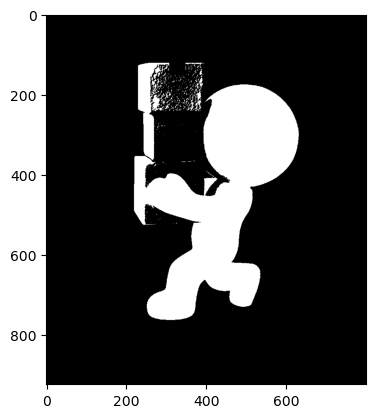

In [46]:
# create a mask from the contours
mask = cv2.fillPoly(thresh, contours, 255)
plt.imshow(mask, cmap='gray')

In [70]:
import cv2
import numpy as np
import os
import glob

def process_images(input_folder, output_folder, delta=np.array([10, 50, 50])):
    os.makedirs(output_folder, exist_ok=True)
    
    image_paths = glob.glob(os.path.join(input_folder, '*.png'))
    
    for image_path in image_paths:
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        
        # Separate alpha channel if it exists; if not, create one
        if image.shape[2] == 4:
            bgr_image = image[:, :, :3]
            alpha_channel = image[:, :, 3]
        else:
            bgr_image = image
            alpha_channel = np.ones(bgr_image.shape[:2], dtype=np.uint8) * 255

        hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
        
        # Sample background colors from edges
        shape = hsv_image.shape
        edges = [hsv_image[shape[0]//2, -10, :], hsv_image[10, shape[1]//2, :], hsv_image[-10:, shape[1]//2, :]]
        colors = [np.median(edge.reshape(-1, 3), axis=0) for edge in edges]
        
        # Create and combine masks for background colors
        masks = [cv2.inRange(hsv_image, color - delta, color + delta) for color in colors]
        background_mask = cv2.bitwise_or(cv2.bitwise_or(*masks[:2]), masks[2])
        background_mask = cv2.bitwise_not(background_mask)
        
        # Detect and fill contours
        contours, _ = cv2.findContours(background_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        mask = np.zeros_like(background_mask)
        cv2.drawContours(mask, contours, -1, 255, cv2.FILLED)
        
        # Apply mask and clean up result
        result = cv2.bitwise_and(bgr_image, bgr_image, mask=mask)
        
        # Adjust the alpha channel to make the background transparent
        alpha_channel = cv2.bitwise_and(alpha_channel, mask)
        
        # Combine BGR with the new alpha channel
        final_result = cv2.merge((result, alpha_channel))
        final_result = cv2.morphologyEx(final_result, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8))
        
        # Save the result as a PNG with transparency
        output_path = os.path.join(output_folder, os.path.basename(image_path))
        cv2.imwrite(output_path, final_result)

# Usage
process_images(input_folder='smiski_images', output_folder='output_images')


In [ ]:
import cv2
import matplotlib.pyplot as plt

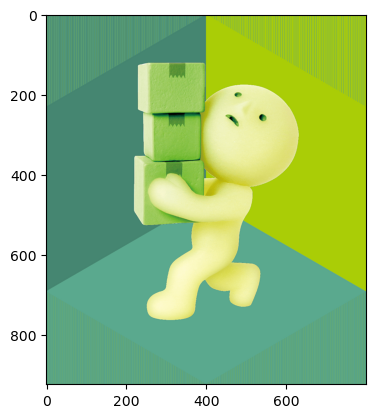

In [ ]:
img = cv2.imread('smiski_images/balancing-boxes.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

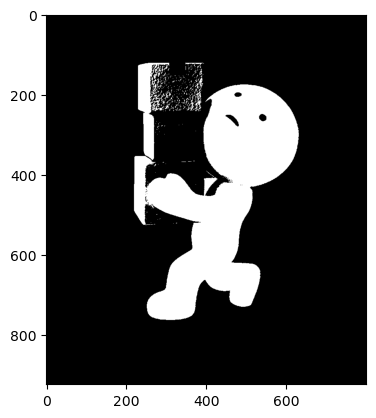

In [ ]:
# code to threshold the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

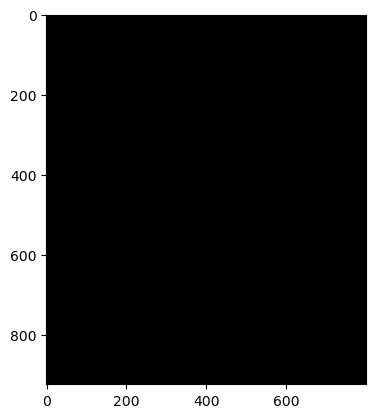

In [ ]:
# find contours and combine them filled
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
filled = img.copy()
cv2.drawContours(filled, contours, -1, (0, 255, 0), cv2.FILLED)
plt.imshow(cv2.cvtColor(filled, cv2.COLOR_BGR2RGB))

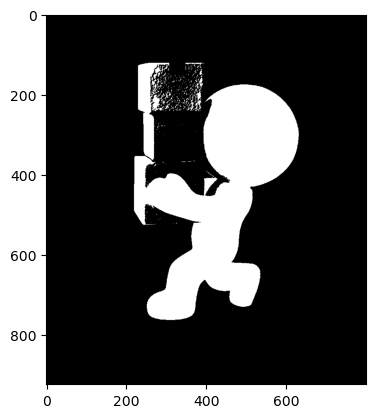

In [ ]:
# create a mask from the contours
mask = cv2.fillPoly(thresh, contours, 255)
plt.imshow(mask, cmap='gray')

In [ ]:
import cv2
import numpy as np
import os
import glob

def process_images(input_folder, output_folder, delta=np.array([10, 50, 50])):
    os.makedirs(output_folder, exist_ok=True)
    
    image_paths = glob.glob(os.path.join(input_folder, '*.png'))
    
    for image_path in image_paths:
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        
        # Separate alpha channel if it exists
        if image.shape[2] == 4:
            bgr_image = image[:, :, :3]
            alpha_channel = image[:, :, 3]
        else:
            bgr_image = image
            alpha_channel = np.ones(bgr_image.shape[:2], dtype=np.uint8) * 255

        hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
        
        # Sample background colors from edges
        shape = hsv_image.shape
        edges = [hsv_image[shape[0]//2, 10, :], hsv_image[10, shape[1]//2, :], hsv_image[-10:, shape[1]//2, :]]
        colors = [np.median(edge.reshape(-1, 3), axis=0) for edge in edges]
        
        # Create and combine masks for background colors
        masks = [cv2.inRange(hsv_image, color - delta, color + delta) for color in colors]
        background_mask = cv2.bitwise_or(cv2.bitwise_or(*masks[:2]), masks[2])
        background_mask = cv2.bitwise_not(background_mask)
        
        # Detect and fill contours
        contours, _ = cv2.findContours(background_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        mask = np.zeros_like(background_mask)
        cv2.drawContours(mask, contours, -1, 255, cv2.FILLED)
        
        # Apply mask and clean up result
        result = cv2.bitwise_and(bgr_image, bgr_image, mask=mask)
        result = cv2.morphologyEx(result, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8))
        
        # Reapply alpha channel
        final_result = cv2.merge((result, alpha_channel))
        
        # Save the result with alpha channel intact
        output_path = os.path.join(output_folder, os.path.basename(image_path))
        cv2.imwrite(output_path, final_result)

# Usage
process_images(input_folder='smiski_images', output_folder='output_images')
